# (a)Simple Linear Regression( One feature only)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


## 1. Implement the linear regression using the (a) Ordinary Least Squares (OLS) Method and (b) Gradient Descent Algorithm Dataset: Swedish Auto Insurance dataset. [Click](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr06.html) here to download

### a)You need to split the dataset into train(60%), validation (20%), and test(20%).

In [ ]:
data=pd.read_excel('https://drive.google.com/uc?export=download&id=1BiEZmB5FcP6V2immKa7fsS3fjazp2euD')
print(data)

*** No CODEPAGE record, no encoding_override: will use 'ascii'
      X      Y
0   108  392.5
1    19   46.2
2    13   15.7
3   124  422.2
4    40  119.4
..  ...    ...
58    9   87.4
59   31  209.8
60   14   95.5
61   53  244.6
62   26  187.5

[63 rows x 2 columns]


In [ ]:
X=data['X']
Y=data['Y']
trainX,testX,trainY,testY=train_test_split(X, Y, test_size=0.40,random_state=42)
train_X=trainX.to_numpy()
train_Y=trainY.to_numpy()
print("training dataset: \n",train_X.shape)

training dataset: 
 (37,)


In [ ]:
crsval_X,test_X,crsval_Y,test_Y=train_test_split(testX, testY, test_size=0.50,random_state=42)
testx=test_X.to_numpy()
testy=test_Y.to_numpy()
crsvalx=crsval_X.to_numpy()
crsvaly=crsval_Y.to_numpy()

In [ ]:
print("crossvalidation dataset:\n ",crsval_X,crsval_Y)

crossvalidation dataset:
  43    37
5     57
33     5
17     6
4     40
48     8
53    15
6     23
12    11
55    29
34    22
8     45
16    24
Name: X, dtype: int64 43    152.8
5     170.9
33     40.3
17     50.9
4     119.4
48     76.1
53     32.1
6      56.9
12     23.5
55    133.3
34    161.5
8     214.0
16    134.9
Name: Y, dtype: float64


In [ ]:
print("testing dataset:\n",test_X,test_Y)

testing dataset:
 25      7
3     124
61     53
19     23
9      10
60     14
13     23
57     24
46     11
36     61
0     108
40     13
49      3
Name: X, dtype: int64 25     77.5
3     422.2
61    244.6
19    113.0
9      65.3
60     95.5
13     39.6
57    137.9
46     21.3
36    217.6
0     392.5
40     89.9
49     39.9
Name: Y, dtype: float64


# Linear Regression through Least Square Method

### Taking out $\theta$o and $\theta$1 for training dataset

In [ ]:
covar=np.cov(train_X,train_Y)[1][0]
varience=np.var(train_X)
theta_1=covar/varience
print(theta_1)

3.793116710824122


In [ ]:
theta_0=np.mean(train_Y)-theta_1*(np.mean(train_X))
print(theta_0)

11.03387805667009


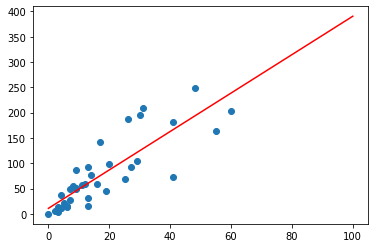

In [ ]:
x=np.linspace(0,100,10)
y=theta_0+theta_1*x
plt.scatter(train_X,train_Y)
plt.plot(x,y,'r')

In [ ]:
train_predicted=[]
for i in range(train_X.shape[0]):
   y=theta_0+theta_1*train_X[i]
   train_predicted.append(y)   

In [ ]:
from sklearn.metrics import mean_absolute_error
training_accuracy=mean_absolute_error(train_Y,train_predicted)
print("training absolute error:",training_accuracy)

training absolute error: 28.013568075240805


In [ ]:
val_predicted=[]
for i in range(crsvalx.shape[0]):
   y=theta_0+theta_1*crsvalx[i]
   val_predicted.append(y) 

val_accuracy=mean_absolute_error(crsvaly,val_predicted)
print("validation absolute error:",val_accuracy)

validation absolute error: 31.854220346558932


In [ ]:
test_predicted=[]
for i in range(testx.shape[0]):
   y=theta_0+theta_1*testx[i]
   test_predicted.append(y) 

testing_accuracy=mean_absolute_error(testy,test_predicted)
print("testing absolute error:",testing_accuracy)

testing absolute error: 32.312259521410134


# (b) Using Gradient Descent Algorithm

In [ ]:
n=len(train_X)
thetag_0=100
thetag_1=100
alpha=0.001
k=100
i=0
while k>0:
    prev_thet0=thetag_0
    prev_thet1=thetag_1
    # print(prev_thet0)
    # print(prev_thet1)
    thetag_0=prev_thet1-alpha*(1/n)*(n*prev_thet0+sum(prev_thet1*train_X)-sum(train_Y))
    thetag_1=prev_thet1-alpha*(1/n)*(sum(prev_thet0*train_X)+sum(prev_thet1*train_X*train_X)-sum(train_Y*train_X))
    k-=1
print("theta_1:",thetag_1)
print("theta_0:",thetag_0)

theta_1: 3.9785940797895485
theta_0: 3.9824022081321235


In [ ]:
train_predicted_gda=[]
for i in range(train_X.shape[0]):
   y=thetag_0+thetag_1*train_X[i]
   train_predicted_gda.append(y)  
training_accuracy=mean_absolute_error(train_Y,train_predicted_gda)
print("training absolute error in gradient descesnt algorithm:",training_accuracy)

training absolute error in gradient descesnt algorithm: 27.5872009442782


In [ ]:
test_predicted_gda=[]
for i in range(testx.shape[0]):
   y=thetag_0+thetag_1*testx[i]
   test_predicted_gda.append(y)  
testing_accuracy=mean_absolute_error(testy,test_predicted_gda)
print("testing absolute error in gradient descesnt algorithm:",testing_accuracy)

testing absolute error in gradient descesnt algorithm: 36.507671364440185


In [ ]:
validation_predicted_gda=[]
for i in range(crsvalx.shape[0]):
   y=thetag_0+thetag_1*crsvalx[i]
   validation_predicted_gda.append(y)  
validation_accuracy=mean_absolute_error(crsvaly,validation_predicted_gda)
print("validation absolute error in gradient descesnt algorithm:",validation_accuracy)

validation absolute error in gradient descesnt algorithm: 33.05345930630132


# Part2:Multiple Linear Regression

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
boston = datasets.load_boston(return_X_y=False)
data = np.c_[boston.data, boston.target]
columns = np.append(boston.feature_names, ["target"])
Data=pd.DataFrame(data, columns=columns)
print(Data)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  target
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...     ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67    22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08    20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64    23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48    22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88    11.9

[50

### checking whether any column has null value

In [ ]:
Data.isnull().sum()

In [ ]:
X=Data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values
Y=Data['target'].values
#X=Data.iloc[:,:-1].values
#Y=Data.iloc[:,-1].values
#print(X)
#print(Y)
print(X.shape)
print(Y.shape)
trainX,testX,trainY,testY=train_test_split(X, Y, test_size=0.40,random_state=0)

(506, 13)
(506,)


In [ ]:
crsval_X,test_X,crsval_Y,test_Y=train_test_split(testX, testY, test_size=0.50,random_state=42)
print("size of cross validation dataset:",crsval_X.shape)
print("size of testing dataset:",test_X.shape)


size of cross validation dataset: (101, 13)
size of testing dataset: (102, 13)


# Applying gradient descent algorithm in multivariable linear regression

In [ ]:
#inserting an extra column of 1 in the front of training,testing and validation dataset
trainX=np.insert(trainX,0,1,axis=1)
crsval_X=np.insert(crsval_X,0,1,axis=1)
test_X=np.insert(test_X,0,1,axis=1)
print(trainX.shape)
print(test_X.shape)
print(crsval_X.shape)
#now making a gradient descent algorithm
theta=[1]*(trainX.shape[1])#making all possible theta for each columns it will be representing the coefficient of each column
alpha=0.000001 #learning rate of learning
x=10000
n=len(trainX)
while x>0:
  temp=[0]*(trainX.shape[1])#this is sort of temp variable used to store the new values of theta
  for i in range(len(trainX[0])):
    xs=[]
    for j in trainX:
      xs.append(j[i])
    prod=np.matmul(trainX,theta)
    sumation=sum((prod-trainY)*xs)
    temp[i]=alpha*(1/n)*(sumation)
   
  for i in range(len(theta)):
      theta[i]-= temp[i] 
  x-=1     

print(theta)

(303, 14)
(102, 14)
(101, 14)
[0.9933685007945522, 0.4507355560686093, 0.19702954703794293, 0.8235204991952525, 1.0030138120980807, 0.995266337322366, 0.9994215841847458, -0.03274602019727563, 0.9413332878781506, 0.9131573735470596, -0.09257912874505703, 0.8085981484017778, 0.027448567329576658, 0.3575645499658012]


### Predicting the mean absolute error of train ,testing and validation dataset

In [ ]:
predicted_training_val=trainX@theta
mae=mean_absolute_error(trainY, predicted_training_val)
print("\nMean Absolute Error for Traine: ",mae)
print(len(theta))



Mean Absolute Error for Traine:  8.476756801686776
14


In [ ]:
predicted_validation_val=crsval_X@theta
mae_validation=mean_absolute_error(crsval_Y, predicted_validation_val)
print("\nMean Absolute Error for validation dataset: ",mae)
print(crsval_X.shape)
print(len(theta))


Mean Absolute Error for validation dataset:  8.476756801686776
(101, 14)
14


In [ ]:
predicted_testing_val=test_X@theta
mae_test=mean_absolute_error(test_Y, predicted_testing_val)
print("\nMean Absolute Error for testing dataset: ",mae)


Mean Absolute Error for testing dataset:  8.476756801686776
